In [8]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython import display

1.1) Complete the following distance function

In [15]:
# Computes a Euclidean distance between points A and B
def getEuclideanDistance(A, B):
    A = np.array(A)
    B = np.array(B)
    return(np.linalg.norm(A - B))
    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

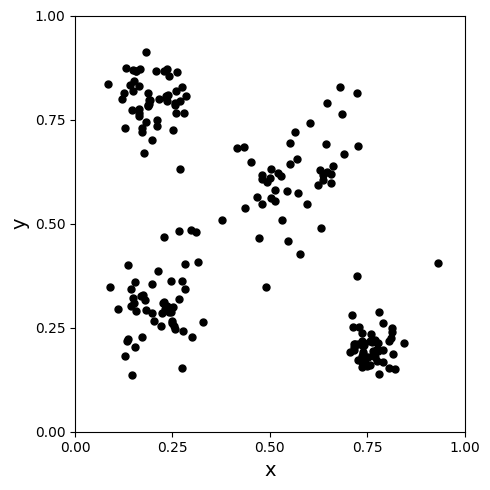

In [17]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

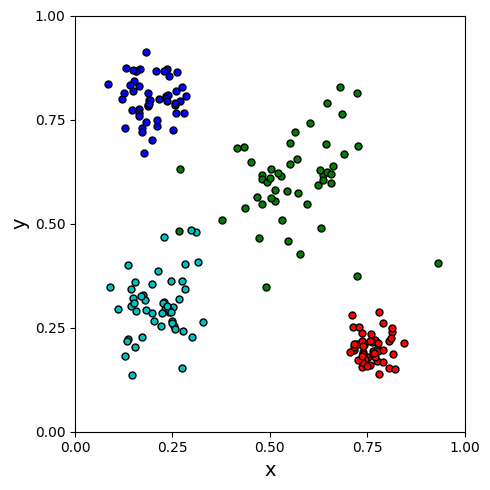

In [18]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [19]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    Centroids = []
    temp1 = data
    np.random.shuffle(temp1)
    temp2 = temp1
    for i in range(K):
        Centroids.append(temp2[i])
    return Centroids

print(getCentroids(2, data))

[[0.1258723758824749, 0.81424096244157], [0.758364910839459, 0.2173608631410356]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [20]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):    
    NO_CHANGE = True
    if ASSIGNMENTS is None: NO_CHANGE = False
    NEW_ASSIGNMENTS = [[] for k in range(K)]
    for i in range(len(DATA)):
        dist = float('inf')
        for j in range(K):
            z = getEuclideanDistance(DATA[i],CENTROIDS[j])
            if z < dist:
                dist = z
                temp1 = j
        NEW_ASSIGNMENTS[temp1].append(i)

    NEW_CENTROIDS = [[] for i in range(K)]
    for cluster in range(K):
        for atr in range(M):
            temp2 = 0
            for point in range(len(NEW_ASSIGNMENTS[cluster])):
                temp2 += DATA[NEW_ASSIGNMENTS[cluster][point]][atr]
            avrg = temp2/(len(NEW_ASSIGNMENTS[cluster]))
            NEW_CENTROIDS[cluster].append(avrg)
            
    if NEW_ASSIGNMENTS != ASSIGNMENTS:
        NO_CHANGE = False
    
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS 

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

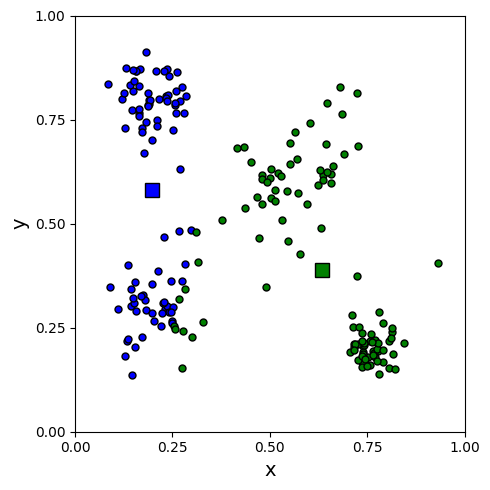

In [21]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

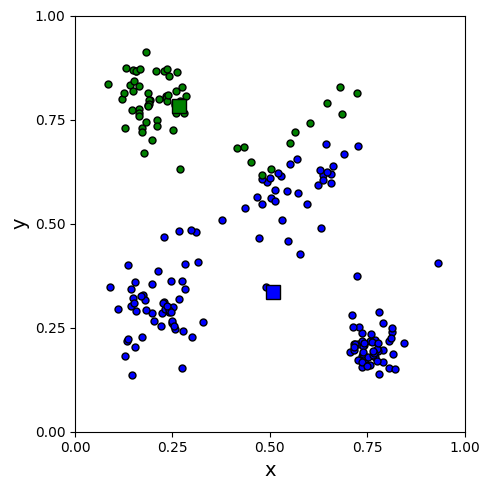

7


In [25]:
def doKMeans(DATA, CENTROIDS, K, M, display = True):
    ASSIGNMENTS = [[] for i in range(K)]
    NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
    z = 1
    for i in range(99):
        if NO_CHANGE == False:
            z += 1
            NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        if NO_CHANGE == True: 
            break
    cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)
    print(z)
    return DATA, CENTROIDS, ASSIGNMENTS   

K = 2
M = len(DATA[0])
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K, M)


1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

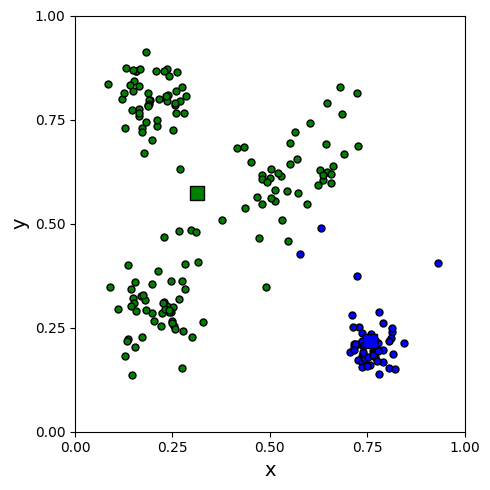

3


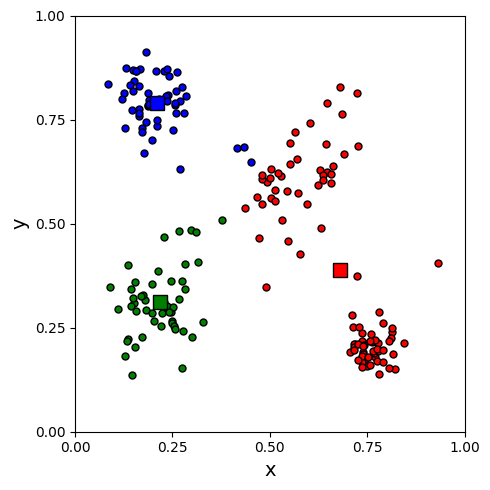

3


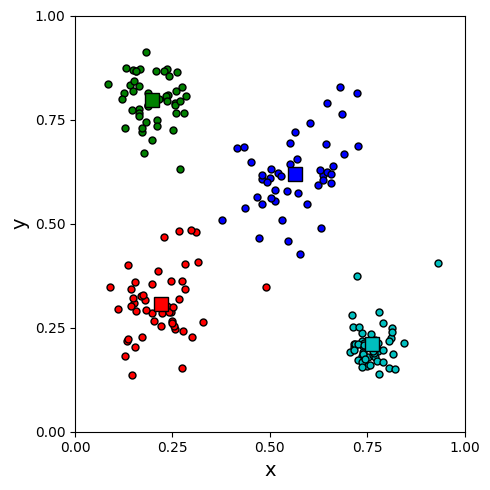

7


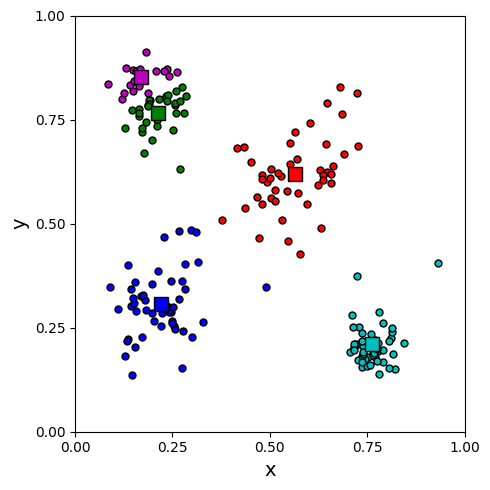

6


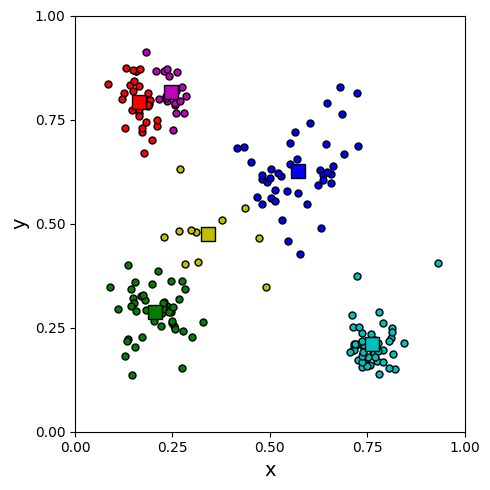

6


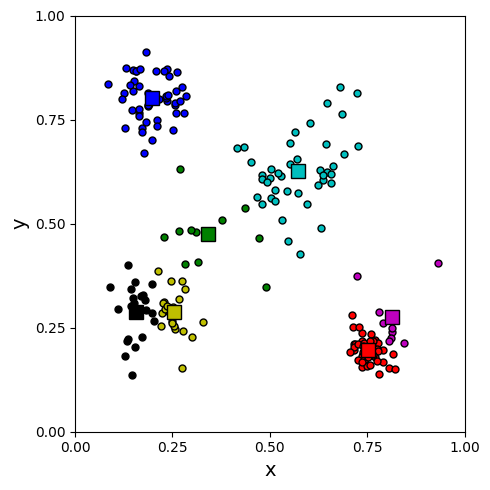

13


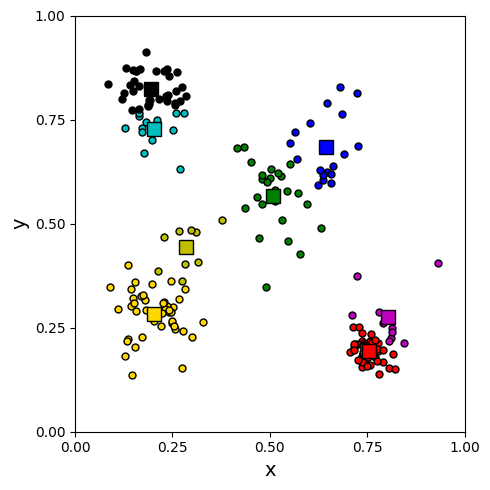

4


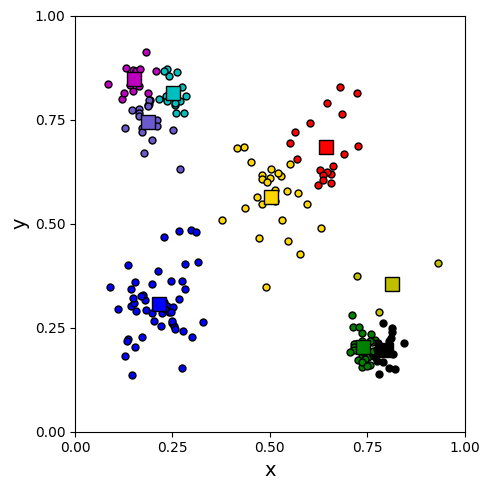

9


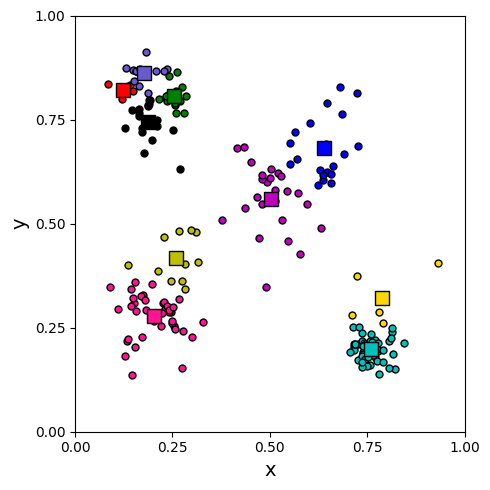

12


In [26]:

DATA = cm.getTestDataSet()
M = len(DATA[0])


for K in range(2, 11):
    CENTROIDS = getCentroids(K, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K, M)

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

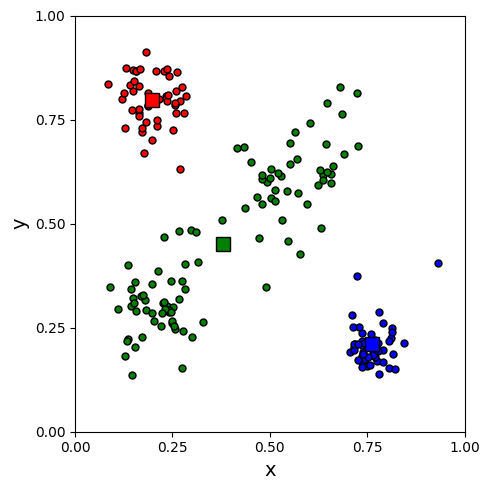

3


29.409852785562244

In [27]:
K = 3
DATA = cm.getTestDataSet()
M = len(DATA[0])
CENTROIDS = getCentroids(K, DATA)


DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K, M)

def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    temp1 = 0
    for i in range(len(ASSIGNMENTS)):
        for j in range(len(ASSIGNMENTS[i])):
            temp1 += getEuclideanDistance(CENTROIDS[i],DATA[ASSIGNMENTS[i][j]])
    return temp1
getTotalDistance(DATA,CENTROIDS,ASSIGNMENTS)

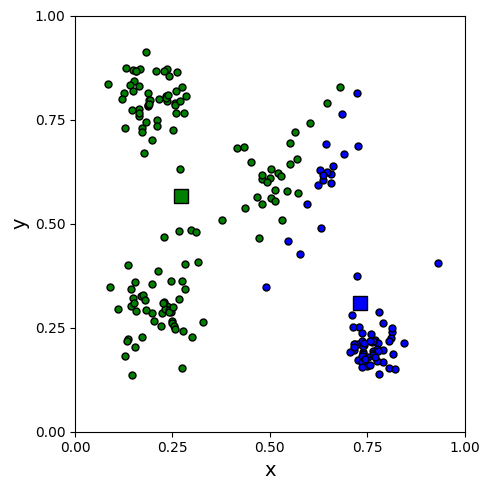

4
45.617753529367214


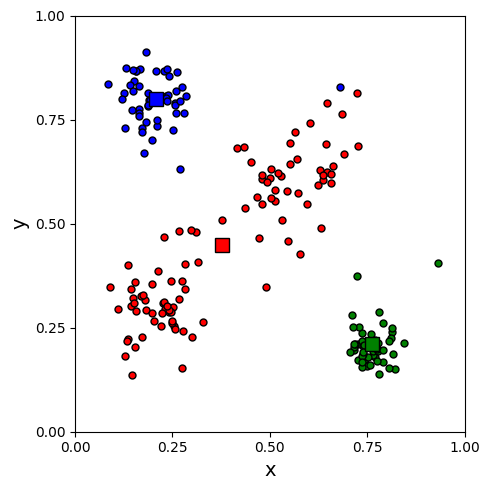

4
29.409713478464344


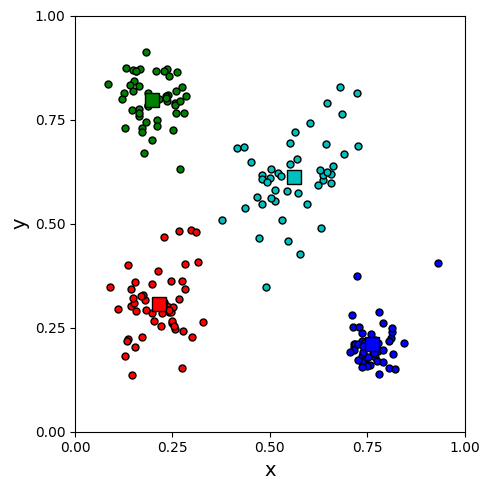

11
15.367806549635768


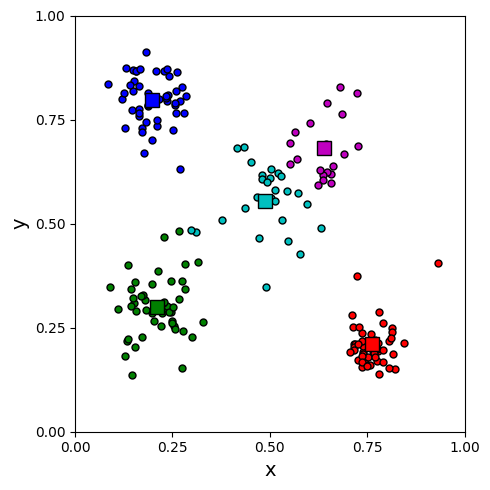

11
13.898260814185447


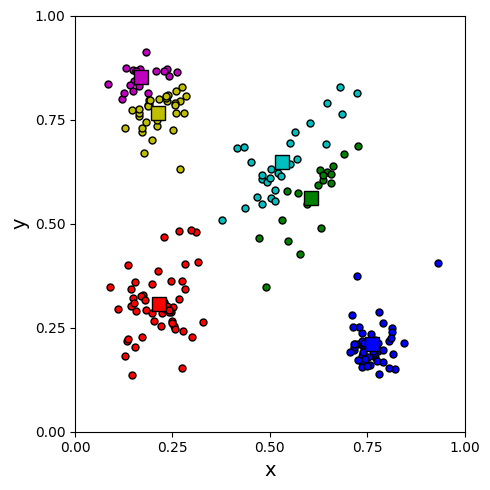

9
13.977855920529496


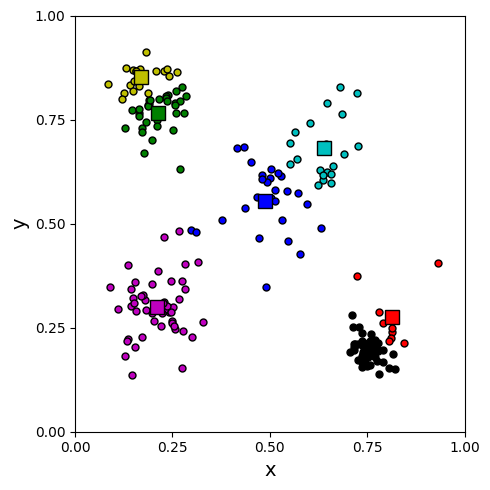

6
12.789404888062691


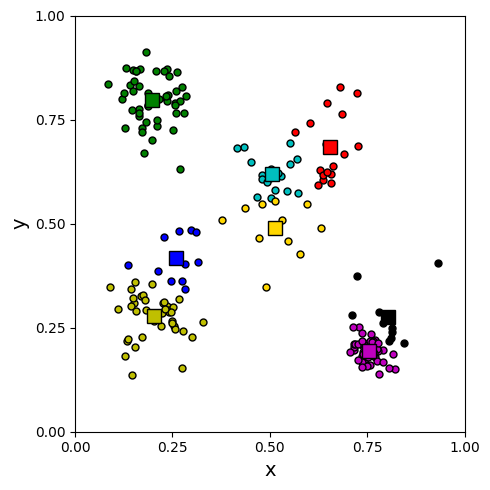

17
12.140438663940376


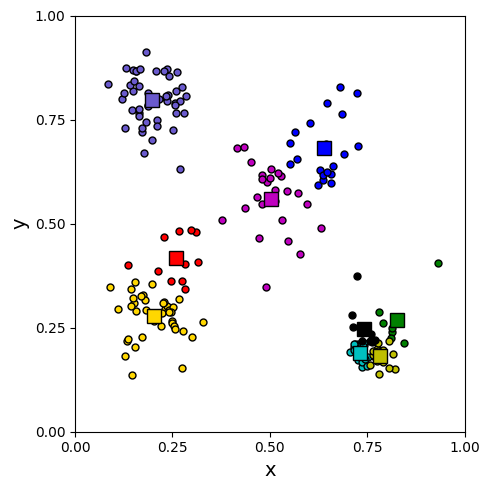

14
12.158898141781036


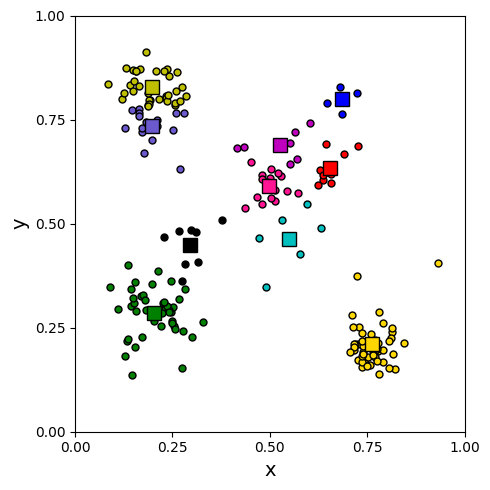

13
11.071190002716621
[[2, 45.617753529367214], [3, 29.409713478464344], [4, 15.367806549635768], [5, 13.898260814185447], [6, 13.977855920529496], [7, 12.789404888062691], [8, 12.140438663940376], [9, 12.158898141781036], [10, 11.071190002716621]]


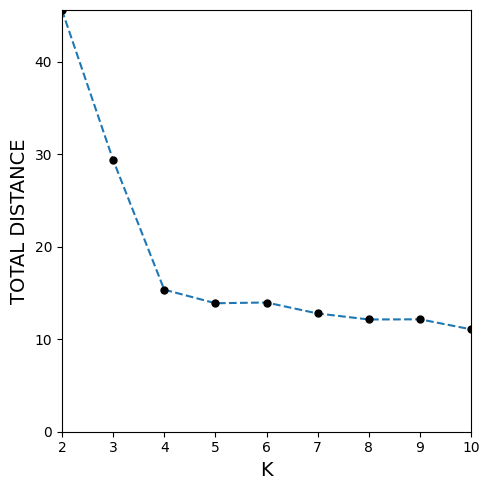

[-16.20804005090287, -14.041906928828576, -1.4695457354503212, 0.07959510634404943, -1.188451032466805, -0.6489662241223151, 0.01845947784065949, -1.0877081390644143]
[0.009475704665807388, 0.5264110777312547, 1.0527175321224356, 0.9507255199099777, 0.2956497203983058, 0.5941055271084241, 0.8458425406125779]
5


In [31]:
DATA = cm.getTestDataSet()
M = len(DATA[0])
results = []

def getDirection(point1, point2):
    dire = (point1[1] - point2[1])/(point1[0] - point2[0])
    return dire
def getAngle(dire1, dire2):
    z =np.arctan((abs((dire1 - dire2)/(1+(dire1*dire2)))))
    return z
    
for K in range(2,11):
    DATA
    CENTROIDS = getCentroids(K, DATA)
    DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K, M)
    print(getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS))
    results.append([K,getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS)])
print(results)
cm.displayResults(plt, results)

#Trying to automate finding elbow however it works poorly
directions = []
angles = []
for k in range(len(results)-1):
   directions.append(getDirection(results[k], results[k+1]))
print(directions)
for j in range(len(results)-2):
   angles.append(getAngle(directions[j], directions[j+1]))
print(angles)
print(3 + max([i if angles[i] == max(angles) else -1 for i in range(len(angles))]))

### Manual analysis
Elbow is at k = 4

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [32]:
DATA = cm.getCaseDataSet()

In [34]:
M = len(DATA[0])

def getAtributeSet(DATA,Atr):
    AtrSet = []
    for i in range(len(DATA)):
        AtrSet.append(DATA[i][Atr])
    return AtrSet

def Normalize(DATA, Atr):
    global M
    NormalizedAtrSet = []
    for i in range(len(DATA[0])):
        z = (DATA[Atr][i] - min(DATA[Atr]))/(max(DATA[Atr])-min(DATA[Atr]))
        NormalizedAtrSet.append(z)
    return NormalizedAtrSet
    
DATA_N = []
NormalizedGroupedAtr = []
GroupedAtr = []
for m in range(M):
    AtrSet = getAtributeSet(DATA, m)
    GroupedAtr.append(AtrSet)
for m in range(M):
    NormalizedAtrSet = Normalize(GroupedAtr, m)
    NormalizedGroupedAtr.append(NormalizedAtrSet)
    
for i in range(len(DATA)):
    temp1 = []
    for j in range(M):
        z = NormalizedGroupedAtr[j][i]
        temp1.append(z)
    DATA_N.append(temp1)

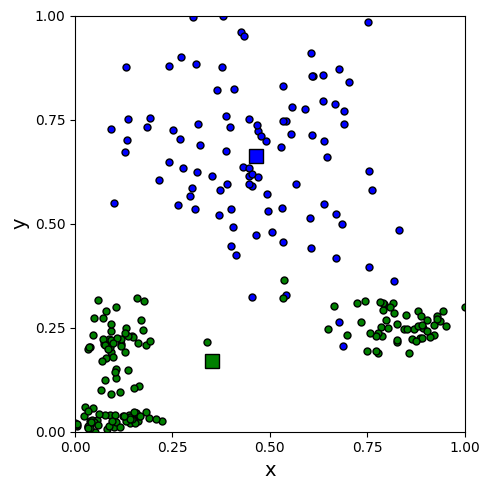

6
129.9530747751782


In [35]:
results_test = []
K = 2
M = len(DATA_N[0])

def doKMeans_CaseStudy(DATA, M, K):
    ASSIGNMENTS = [[] for i in range(K)]
    CENTROIDS = getCentroids(K, DATA)
    NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
    z = 1
    for i in range(99):
        if NO_CHANGE == False:
            z += 1
            NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        if NO_CHANGE == True:
            break
    cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)
    print(z)
    print(getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS))
    return DATA, CENTROIDS, ASSIGNMENTS 


DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(DATA_N, M, K)

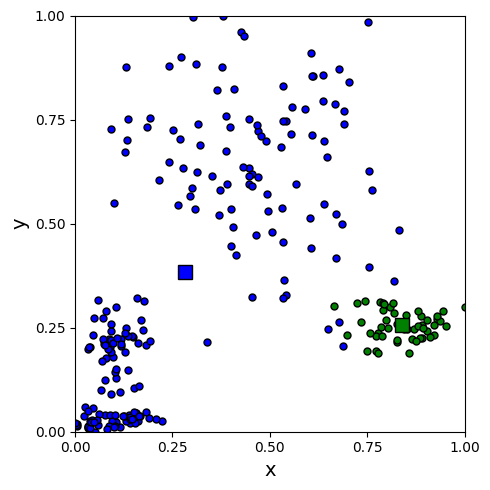

2
119.47288914667807


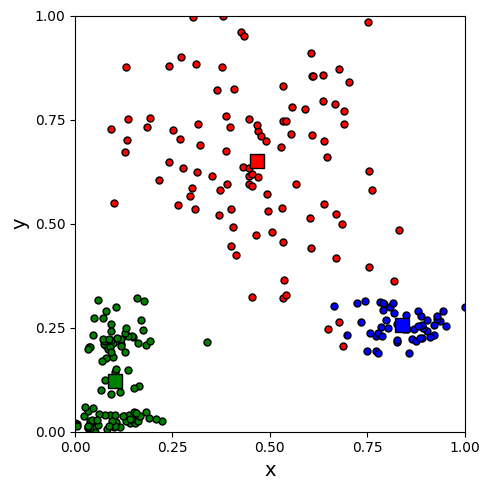

3
94.1244354628524


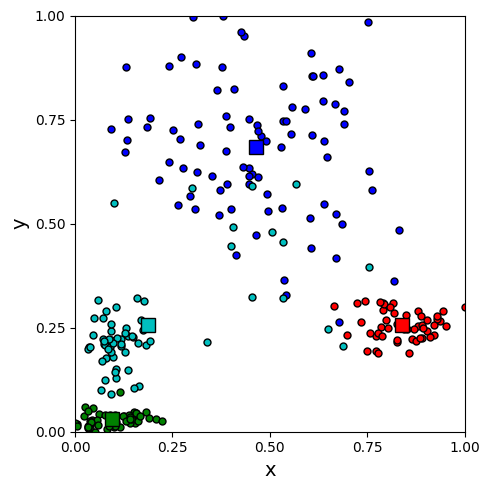

8
71.07969024135154


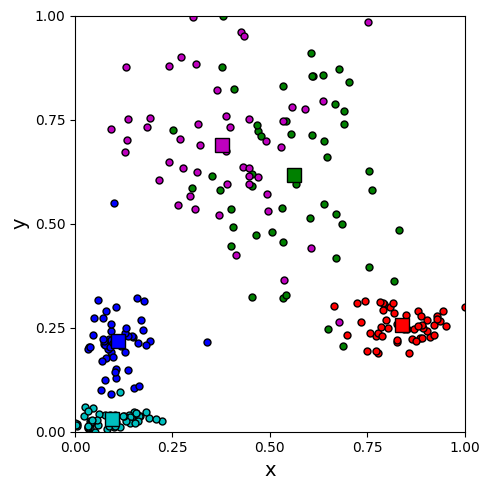

4
55.479682088103495


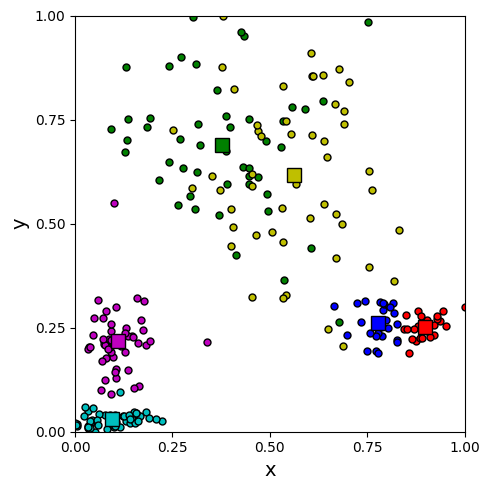

10
54.64619576291436


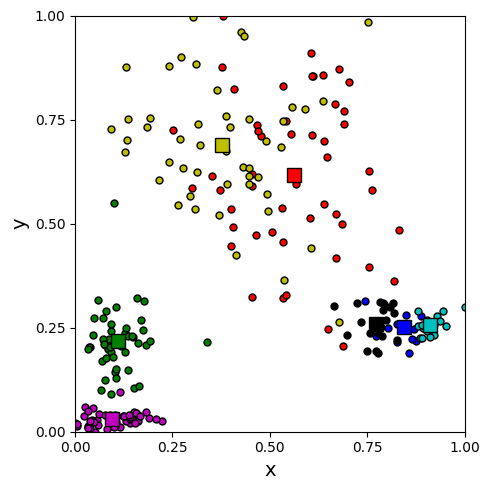

6
54.15274349222201


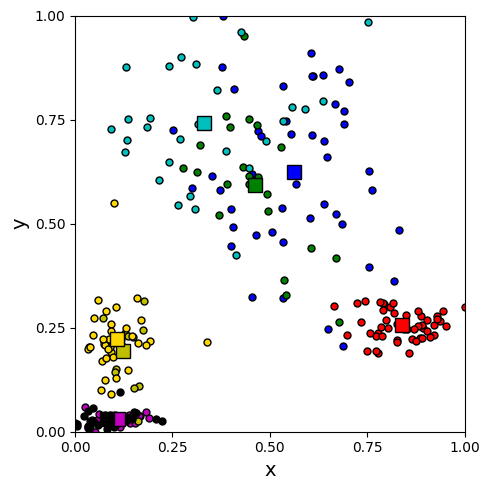

13
50.09096693520562


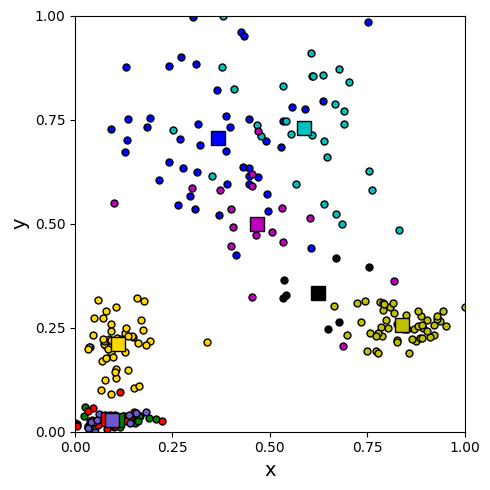

14
47.771794352230685


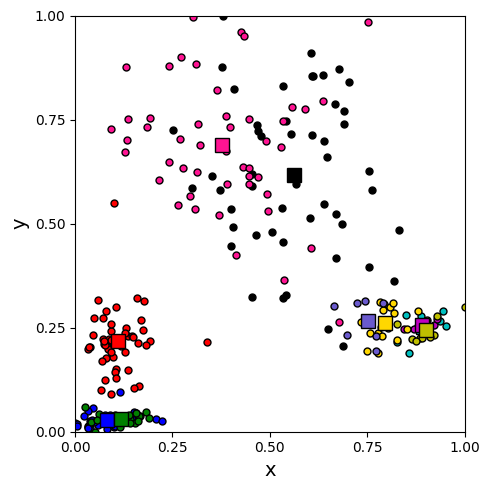

7
50.70562113400286
[[2, 119.47288914667807], [3, 94.1244354628524], [4, 71.07969024135154], [5, 55.479682088103495], [6, 54.64619576291436], [7, 54.15274349222201], [8, 50.09096693520562], [9, 47.771794352230685], [10, 50.70562113400286]]


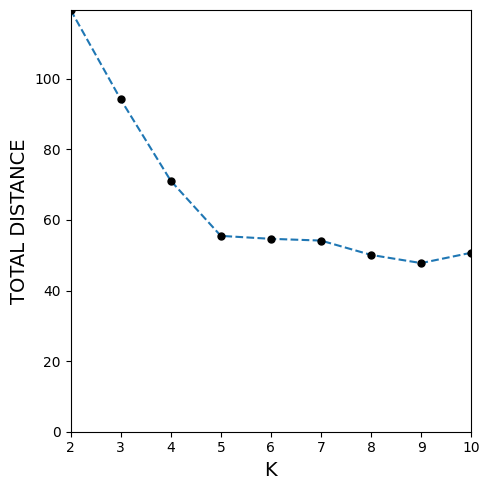

In [36]:

global DATA_N
M = len(DATA_N[0])
result_test = []

for K in range(2, 11):
    DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(DATA_N, M, K)
    result_test.append([K,getTotalDistance(DATA_N, CENTROIDS, ASSIGNMENTS)])
print(result_test)
cm.displayResults(plt, result_test)

### Manual analysis
Elbow seems to be at K = 5

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

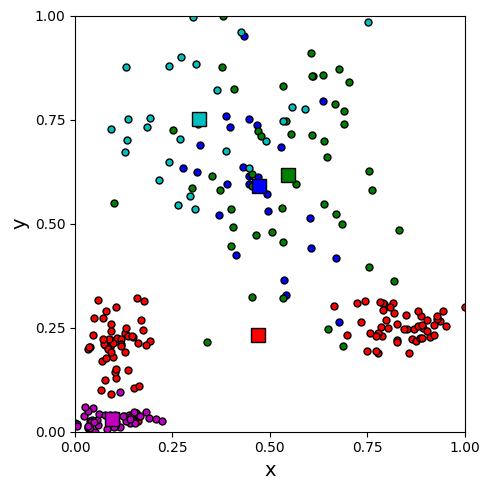

9
92.14453462764367


In [37]:
DATA = cm.getCaseDataSet()


M = len(DATA_N[0])
K = 5

DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(DATA_N, M, K)

In [38]:
def mean(assignment, cluster, atr):
    temp = 0
    for j in assignment[cluster]:
        temp += DATA[j][atr]
    sol = temp/len(assignment[cluster])
    return sol
        
def minimal(assignment, cluster, atr):
    temp = []
    for j in assignment[cluster]:
        temp.append(DATA[j][atr])
    sol = min(temp)
    return sol
def maximal(assignment, cluster, atr):
    temp = []
    for j in assignment[cluster]:
        temp.append(DATA[j][atr])
    sol = np.max(temp)
    return sol
def deviation(assignment, cluster, atr):
    temp = []
    for j in assignment[cluster]:
        temp.append(DATA[j][atr])
    sol = np.std(temp)
    return sol

for i in range(M):
    for j in range(K):
        print('Mean'+' cluster:'+str(j+1)+'  attribute:'+str(i+1)+' : '+str(mean(ASSIGNMENTS, j, i)))
        print('Min'+' cluster:'+str(j+1)+'  attribute:'+str(i+1)+' : '+str(minimal(ASSIGNMENTS, j, i)))
        print('Max'+' cluster:'+str(j+1)+'  attribute:'+str(i+1)+' : '+str(maximal(ASSIGNMENTS, j, i)))
        print('Standard Deviation'+' cluster:'+str(j+1)+'  attribute:'+str(i+1)+' : '+str(deviation(ASSIGNMENTS, j, i)))

Mean cluster:1  attribute:1 : 38.35166908282053
Min cluster:1  attribute:1 : 15.012362258670485
Max cluster:1  attribute:1 : 72.12386809898001
Standard Deviation cluster:1  attribute:1 : 20.842211685309138
Mean cluster:2  attribute:1 : 42.32075654967073
Min cluster:2  attribute:1 : 16.742376949939988
Max cluster:2  attribute:1 : 72.4834333864245
Standard Deviation cluster:2  attribute:1 : 18.451033227937227
Mean cluster:3  attribute:1 : 40.58228564599065
Min cluster:3  attribute:1 : 15.15974475569533
Max cluster:3  attribute:1 : 76.502845395385
Standard Deviation cluster:3  attribute:1 : 20.35810218852964
Mean cluster:4  attribute:1 : 41.59764133084301
Min cluster:4  attribute:1 : 17.117133694087226
Max cluster:4  attribute:1 : 69.84953983248411
Standard Deviation cluster:4  attribute:1 : 17.97629462642509
Mean cluster:5  attribute:1 : 38.84632791227024
Min cluster:5  attribute:1 : 17.288742632281075
Max cluster:5  attribute:1 : 79.5991240593619
Standard Deviation cluster:5  attribute: